In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Loading the dataset
df = pd.read_csv("SucideData 2.csv")  


# Check for missing values
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
 gdp_for_year            0
gdp_per_capita           0
generation               0
dtype: int64

In [ ]:
# Fill missing values 

df.fillna(method='ffill', inplace=True)

In [ ]:
#(EDA)

print(df.describe())

               year   suicides_no    population  suicides/100k pop   
count  27820.000000  27820.000000  2.782000e+04       27820.000000  \
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita  
count  27748.000000    27820.000000  
mean       0.761845    16866.464414  
std        0.091813    18887.576472  
min        0.483000      251.000000  
25%        0.695000     3447.000000  
50%        0.766000     9372.000000  
75%        0.837000    24874.000000  
max        0.944000   126352.000000  


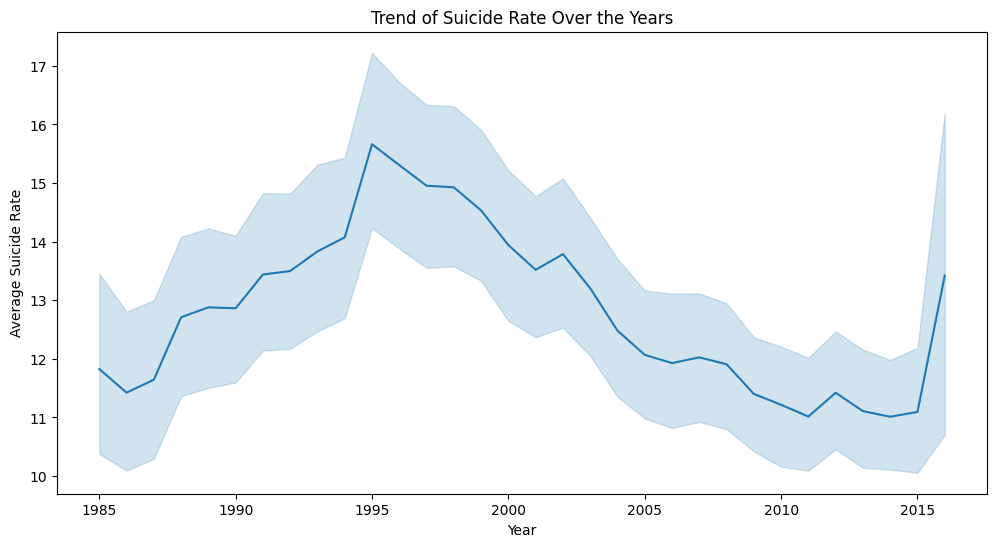

In [ ]:
# Suicide rate over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='suicides/100k pop', data=df, estimator='mean')
plt.title("Trend of Suicide Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Suicide Rate")
plt.show()

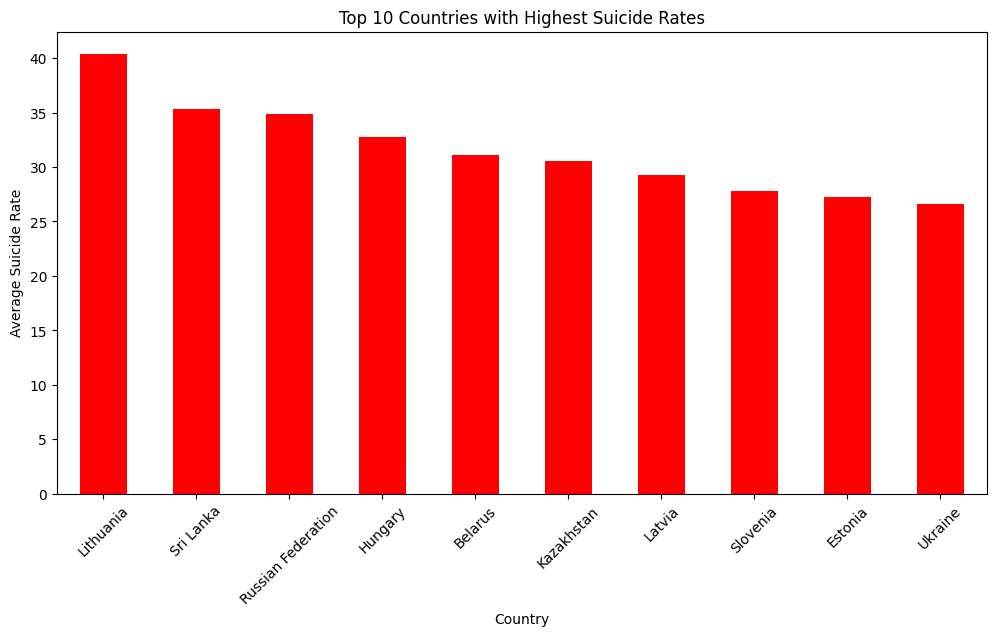

In [ ]:
# Top 10 countries with highest suicide rates
top_countries = df.groupby('country')['suicides/100k pop'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='red')
plt.title("Top 10 Countries with Highest Suicide Rates")
plt.xlabel("Country")
plt.ylabel("Average Suicide Rate")
plt.xticks(rotation=45)
plt.show()

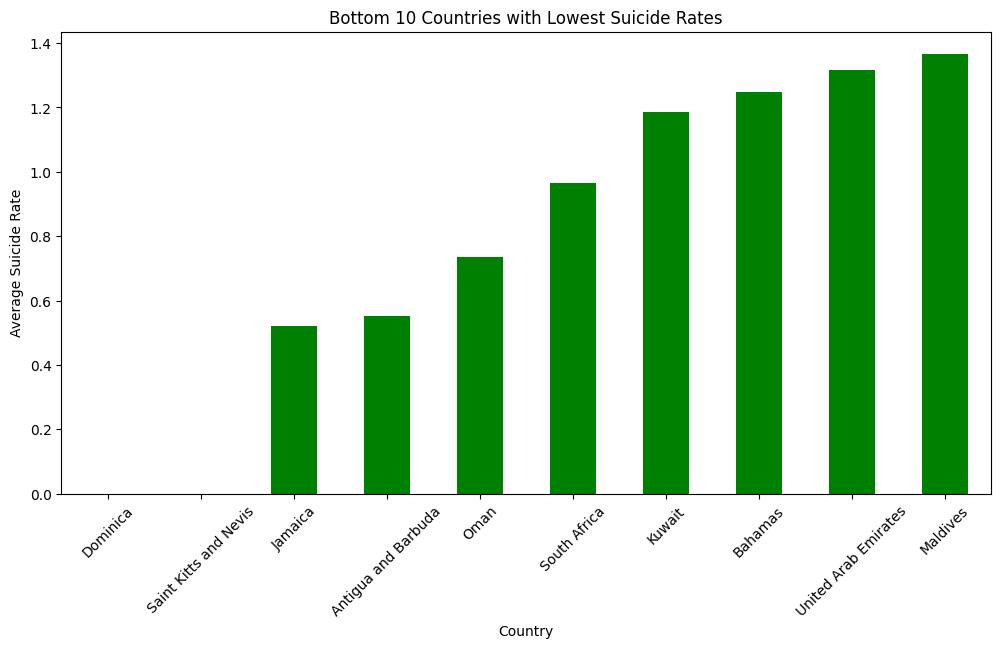

In [ ]:
# Bottom 10 countries with lowest suicide rates
least_countries = df.groupby('country')['suicides/100k pop'].mean().nsmallest(10)
plt.figure(figsize=(12, 6))
least_countries.plot(kind='bar', color='green')
plt.title("Bottom 10 Countries with Lowest Suicide Rates")
plt.xlabel("Country")
plt.ylabel("Average Suicide Rate")
plt.xticks(rotation=45)
plt.show()

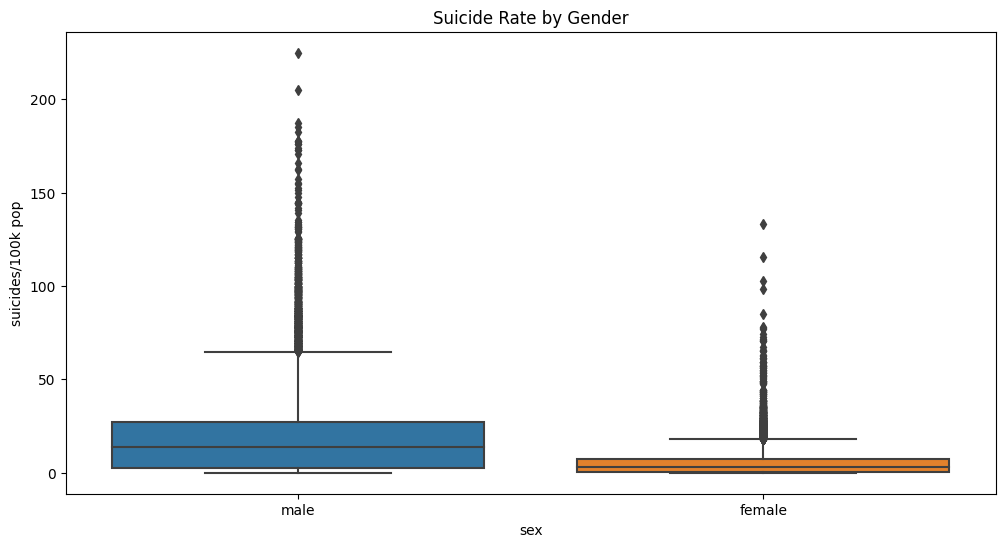

In [ ]:
# Suicide rate comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='suicides/100k pop', data=df)
plt.title("Suicide Rate by Gender")
plt.show()

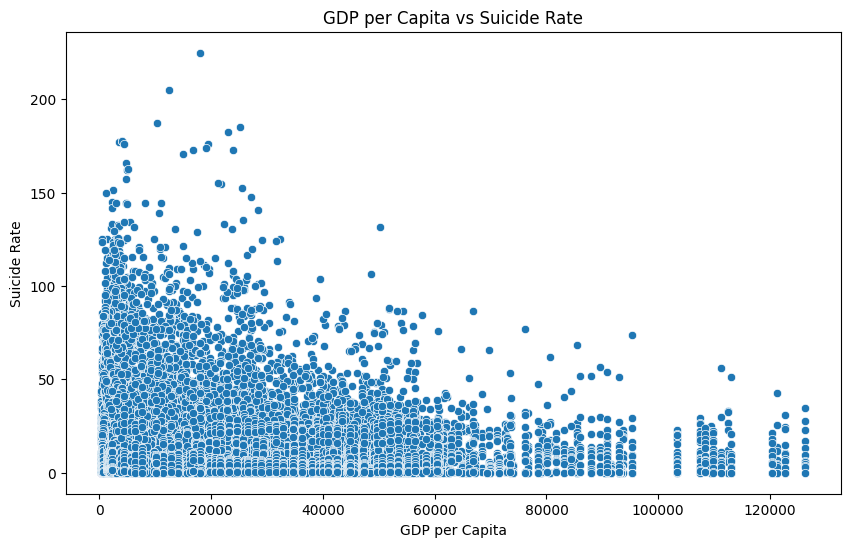

In [ ]:
# Correlation between GDP per capita and suicide rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='suicides/100k pop', data=df)
plt.title("GDP per Capita vs Suicide Rate")
plt.xlabel("GDP per Capita")
plt.ylabel("Suicide Rate")
plt.show()

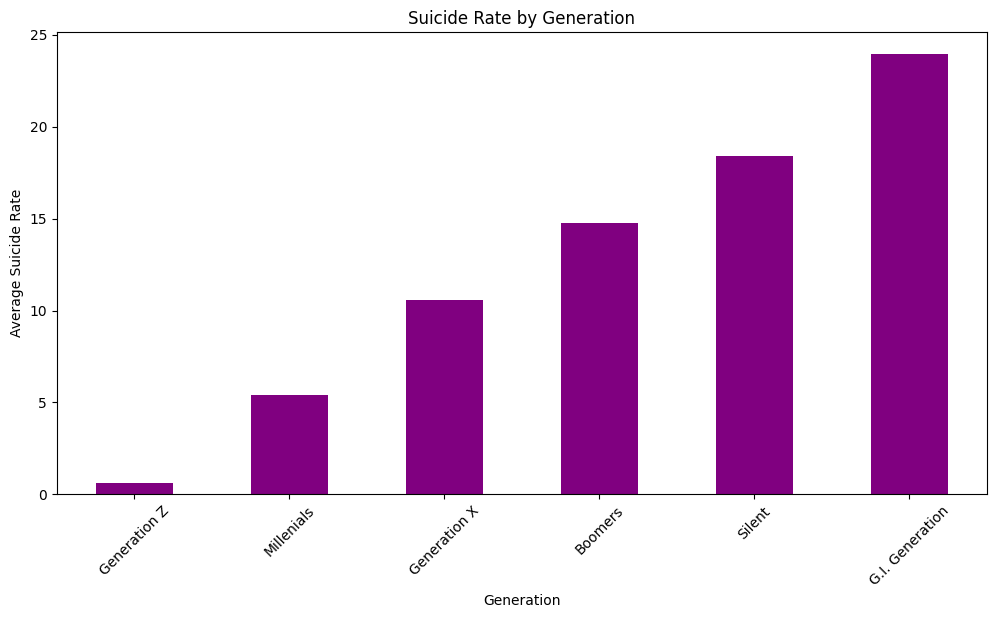

In [ ]:
#  Most affected generation
generation_suicides = df.groupby('generation')['suicides/100k pop'].mean().sort_values()
plt.figure(figsize=(12, 6))
generation_suicides.plot(kind='bar', color='purple')
plt.title("Suicide Rate by Generation")
plt.xlabel("Generation")
plt.ylabel("Average Suicide Rate")
plt.xticks(rotation=45)
plt.show()

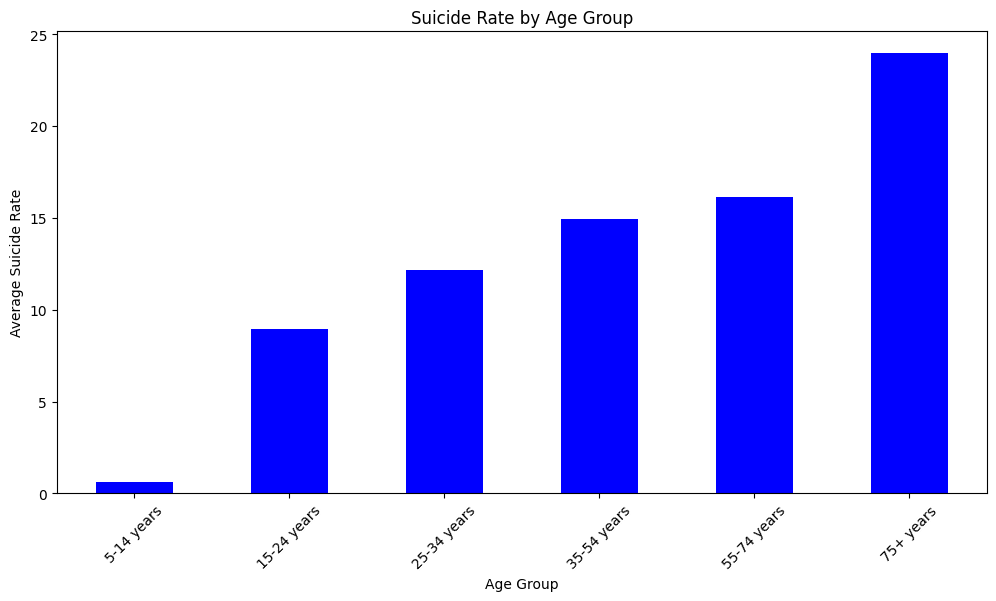

In [ ]:
# Age with highest suicide rate
age_suicides = df.groupby('age')['suicides/100k pop'].mean().sort_values()
plt.figure(figsize=(12, 6))
age_suicides.plot(kind='bar', color='blue')
plt.title("Suicide Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Suicide Rate")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Countries with consistent decrease in suicide rates
trend_countries = df.groupby(['country', 'year'])['suicides/100k pop'].mean().reset_index()
decreasing_countries = trend_countries.groupby('country').apply(lambda x: x['suicides/100k pop'].is_monotonic_decreasing)
decreasing_countries = decreasing_countries[decreasing_countries == True].index.tolist()
print("Countries with consistent decrease in suicide rates:", decreasing_countries)

Countries with consistent decrease in suicide rates: ['Cabo Verde', 'Dominica', 'Macau', 'Mongolia', 'Oman', 'Saint Kitts and Nevis', 'San Marino']


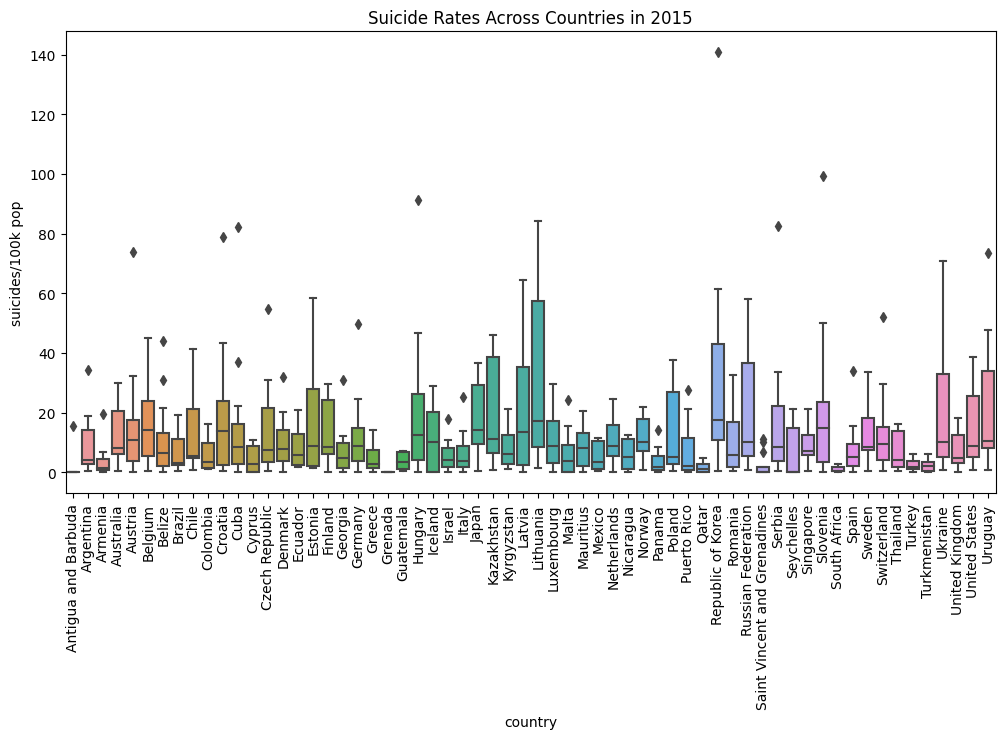

In [ ]:
#  Suicide Rates for a Specific Year
df_2015 = df[df['year'] == 2015]
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='suicides/100k pop', data=df_2015)
plt.xticks(rotation=90)
plt.title("Suicide Rates Across Countries in 2015")
plt.show()